KOBIS 박스오피스 openAPI 사용하기 
(XML 요청)

http://kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do

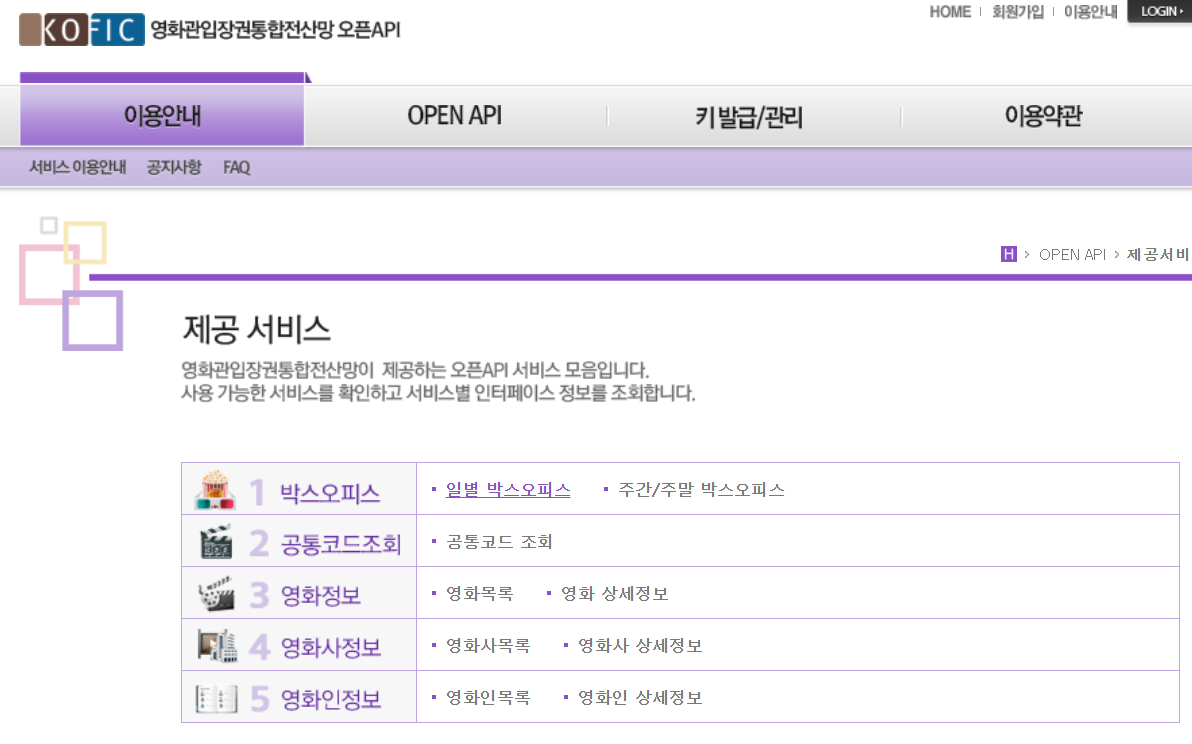

In [1]:
key='dac1451451ff54f43e1f0f59d3356f86'

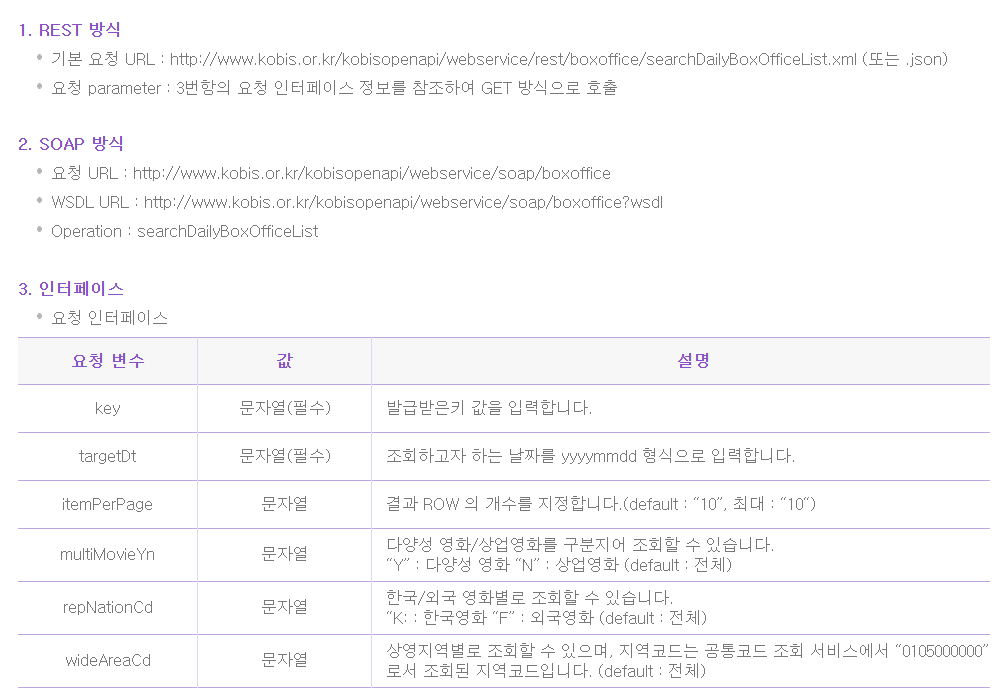

In [2]:
from bs4 import BeautifulSoup
import requests as req
  
    
basic_url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?"
mDate=20200401

# key는 http://www.kobis.or.kr/kobisopenapi 에서 발급받아 사용하 
mURL = basic_url + "key=" + key +"&" + 'targetDt='+ str(mDate)

In [3]:
mURL

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?key=dac1451451ff54f43e1f0f59d3356f86&targetDt=20200401'

In [4]:
resp = req.get(mURL)

In [8]:
if resp.status_code == resp.ok:
    print ("성공적으로 데이터를 수집함")

In [9]:
resp.ok

True

In [11]:
soup = BeautifulSoup(resp.content, "xml") 
#soup

In [12]:
titles = soup.find_all('movieNm')

In [13]:
for i in range(0, len(titles)):
    print(titles[i].get_text())
    

엽문4: 더 파이널
주디
1917
인비저블맨
n번째 이별 중
스케어리 스토리:어둠의 속삭임 
날씨의 아이
라라랜드
너의 이름은.
다크 워터스 


KOBIS 박스오피스 openAPI 사용하기 
(JSON 요청)

In [14]:
import json
import requests
import pandas as pd

In [15]:
mDate=20200401
mURL = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=430156241533f1d058c603178cc3ca0e&targetDt='+ str(mDate)

In [17]:
res = requests.get(mURL)
text = res.text

In [24]:
movieData = json.loads(text)
movieLen = len(movieData['boxOfficeResult']['dailyBoxOfficeList'])
movieDF = pd.DataFrame()
movieDF = movieDF.append(  {"title":"", "cnt":"", "salesShare": "" }, ignore_index=True, sort=False )

In [25]:
for i in range(movieLen):
   movieDF.loc[i,"title"]= movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['movieNm']
   movieDF.loc[i, "cnt"] = movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesAmt']
   movieDF.loc[i, "salesShare"] = float(movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesShare'])

In [20]:
movieDF.head()

,cnt,salesShare,title
0,48850700,19.3,엽문4: 더 파이널
1,31798560,12.6,주디
2,30146760,11.9,1917
3,19394760,7.7,인비저블맨
4,17246100,6.8,n번째 이별 중


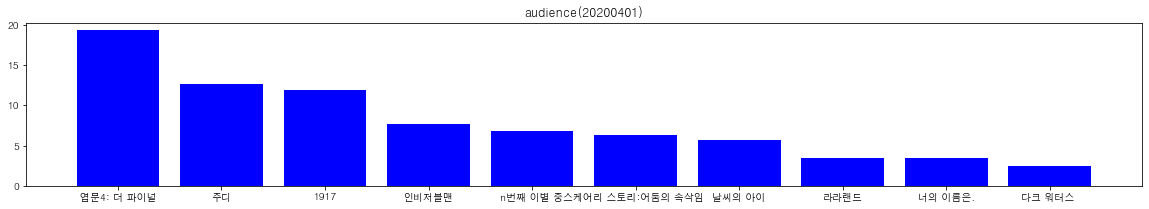

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
 
font_location = 'C:/Windows/Fonts/H2GTRM.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()


plt.rc('font', family=font_name)
plt.rcParams["figure.figsize"] = (20,3) 
plt.title('audience' + '(' + str(mDate) +')') 
plt.bar(movieDF['title'], movieDF['salesShare'], color='b')
plt.show()

In [27]:
movieDF.to_csv('movie'+str(mDate)+'.csv', index=False)